In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay


In [15]:
diabetes=pd.read_csv('../Dataset/diabetes.csv')

diabetes.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [16]:
# The values of "0" are replaced with NaN to be able to perform specific pandas functions
# Except in the Outcome. There 0 is a indicator of No. ALso except for Pregnancies. There 0 is valid value
#  So this columns should not be replaced
columns_to_replace = diabetes.columns.difference(['Outcome', "Pregnancies"])

diabetes_cleaned = diabetes.copy()
diabetes_cleaned[columns_to_replace] = diabetes_cleaned[columns_to_replace].replace(0, np.NaN)

diabetes_cleaned.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
print("Find columns with missing values:")
missing_vals = [col for col in diabetes_cleaned if diabetes_cleaned[col].isnull().sum() > 0]
for col in missing_vals:
    print(col, diabetes_cleaned[col].isnull().sum(), "missing values")


Find columns with missing values:
Glucose 5 missing values
BloodPressure 35 missing values
SkinThickness 227 missing values
Insulin 374 missing values
BMI 11 missing values


In [18]:
diabetes_cleaned['Glucose'].fillna(diabetes_cleaned['Glucose'].median(), inplace = True)

diabetes_cleaned['BloodPressure'].fillna(diabetes_cleaned['BloodPressure'].median(), inplace = True)

diabetes_cleaned['SkinThickness'].fillna(diabetes_cleaned['SkinThickness'].median(), inplace = True)

diabetes_cleaned['Insulin'].fillna(diabetes_cleaned['Insulin'].median(), inplace = True)

diabetes_cleaned['BMI'].fillna(diabetes_cleaned['BMI'].median(), inplace = True)


diabetes_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
X = diabetes_cleaned.drop('Outcome', axis=1)
y = diabetes_cleaned['Outcome']


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predict probabilities and classes
nb_pred = nb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [21]:
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("-" * 30)

# Display results
evaluate_model("Naive Bayes", y_test, nb_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Decision Tree", y_test, dt_pred)

Naive Bayes Results:
Accuracy: 0.7403
Precision: 0.6190
Recall: 0.6500
F1 Score: 0.6341
AUC: 0.7190
Confusion Matrix:
[[119  32]
 [ 28  52]]
------------------------------
Random Forest Results:
Accuracy: 0.7489
Precision: 0.6310
Recall: 0.6625
F1 Score: 0.6463
AUC: 0.7286
Confusion Matrix:
[[120  31]
 [ 27  53]]
------------------------------
Decision Tree Results:
Accuracy: 0.6970
Precision: 0.5581
Recall: 0.6000
F1 Score: 0.5783
AUC: 0.6742
Confusion Matrix:
[[113  38]
 [ 32  48]]
------------------------------


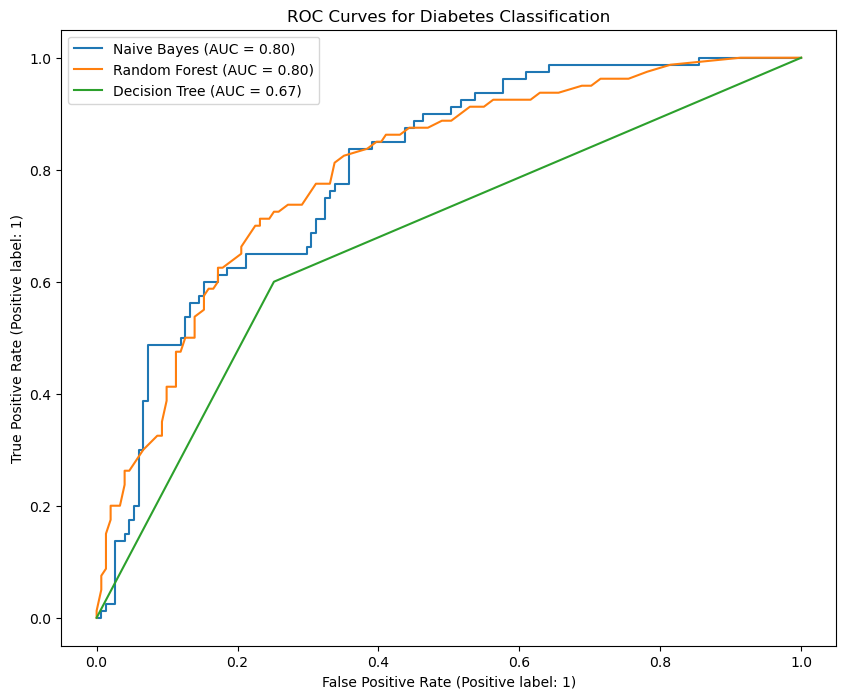

In [23]:
# Plot all ROC curves in one plot
plt.figure(figsize=(10, 8))
for model, name in zip([nb_model, rf_model, dt_model], ["Naive Bayes", "Random Forest", "Decision Tree"]):
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.title('ROC Curves for Diabetes Classification')
plt.legend()
plt.show()